In [64]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_dataset_frame
import produce_pca_files
import my_dataset
import my_dataset_norm
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import csv
from sklearn.utils import Bunch
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier



In [65]:
#dataset = produce_pca_files.load_dataset()   #con riduzione pca
#dataset = my_dataset.load_dataset()           #senza normalizzazione  
dataset = my_dataset_norm.load_dataset()     #con normalizzazione  

In [66]:
dataset.data.shape

(240, 9800)

In [67]:
dataset.data

array([[0.16666667, 0.23333333, 0.23684211, ..., 0.09090909, 0.        ,
        0.        ],
       [0.08333333, 0.13333333, 0.15789474, ..., 0.09090909, 0.05      ,
        0.1       ],
       [0.125     , 0.13333333, 0.15789474, ..., 0.09090909, 0.        ,
        0.        ],
       ...,
       [0.375     , 0.36666667, 0.36842105, ..., 0.27272727, 0.2       ,
        0.2       ],
       [0.25      , 0.26666667, 0.26315789, ..., 0.18181818, 0.1       ,
        0.1       ],
       [0.41666667, 0.46666667, 0.5       , ..., 0.27272727, 0.25      ,
        0.3       ]])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data,dataset.target, test_size=0.2)

In [69]:
y_train.size

192

In [70]:
y_test

array([1, 2, 3, 2, 3, 1, 1, 2, 4, 4, 3, 3, 2, 2, 2, 3, 4, 1, 4, 4, 2, 3,
       3, 3, 3, 3, 1, 4, 3, 4, 3, 2, 2, 4, 3, 2, 4, 4, 2, 3, 2, 4, 4, 1,
       4, 4, 2, 1])

In [137]:
 # // indice prova /// con 33 pca
#classifier = svm.SVC(gamma=0.001) #  a support vector classifier
#classifier = KNeighborsClassifier(5)  
#classifier = SVC(kernel="linear", C=0.025) 
#classifier = SVC(gamma=2, C=1) 
#classifier = GaussianProcessClassifier(1.0 * RBF(1.0))  
#classifier = DecisionTreeClassifier(max_depth=5)  
#classifier = RandomForestClassifier(max_features=1)     #or 5 e 10 e 1
#classifier = MLPClassifier(alpha=1, max_iter=1000) 
#classifier = AdaBoostClassifier()  
#classifier = GaussianNB()  
#classifier = QuadraticDiscriminantAnalysis() 
#classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
classifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [138]:
classifier.fit(x_train,y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [139]:
predicted = classifier.predict(x_test)

In [140]:
accuracy_score(predicted,y_test)

0.375

In [140]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[7 4 2 3]
 [0 9 3 3]
 [1 4 3 3]
 [1 2 3 1]]
Normalized confusion matrix
[[0.4375     0.25       0.125      0.1875    ]
 [0.         0.6        0.2        0.2       ]
 [0.09090909 0.36363636 0.27272727 0.27272727]
 [0.14285714 0.28571429 0.42857143 0.14285714]]


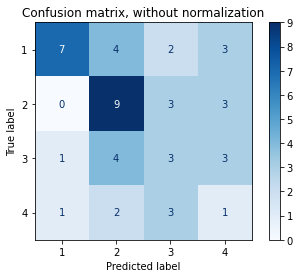

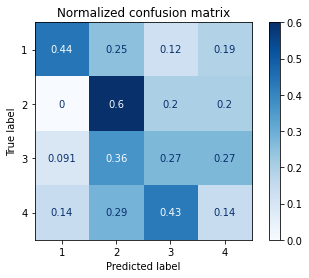

In [141]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()